# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [3]:
orders = pd.read_csv("data/tablon_primario.cv")

In [4]:
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_esperado,Real_vs_Esperado,5estrellas,1estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,0.0,0,0,4,1,1,29.99,8.72
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,0.0,0,0,4,1,1,118.70,22.76
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,0.0,1,0,5,1,1,159.90,19.22
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,0.0,1,0,5,1,1,45.00,27.20
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,0.0,1,0,5,1,1,19.90,8.72


Let's recall our simple analysis from yesterday's exercise: 

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

In [5]:
columnas_permitidas = ["tiempo_de_espera","tiempo_de_espera_esperado", "Real_vs_Esperado", "5estrellas", "1estrella", "review_score","num_de_produc","vendedores_unicos","precio","transporte"]
df = orders[columnas_permitidas]

<Axes: >

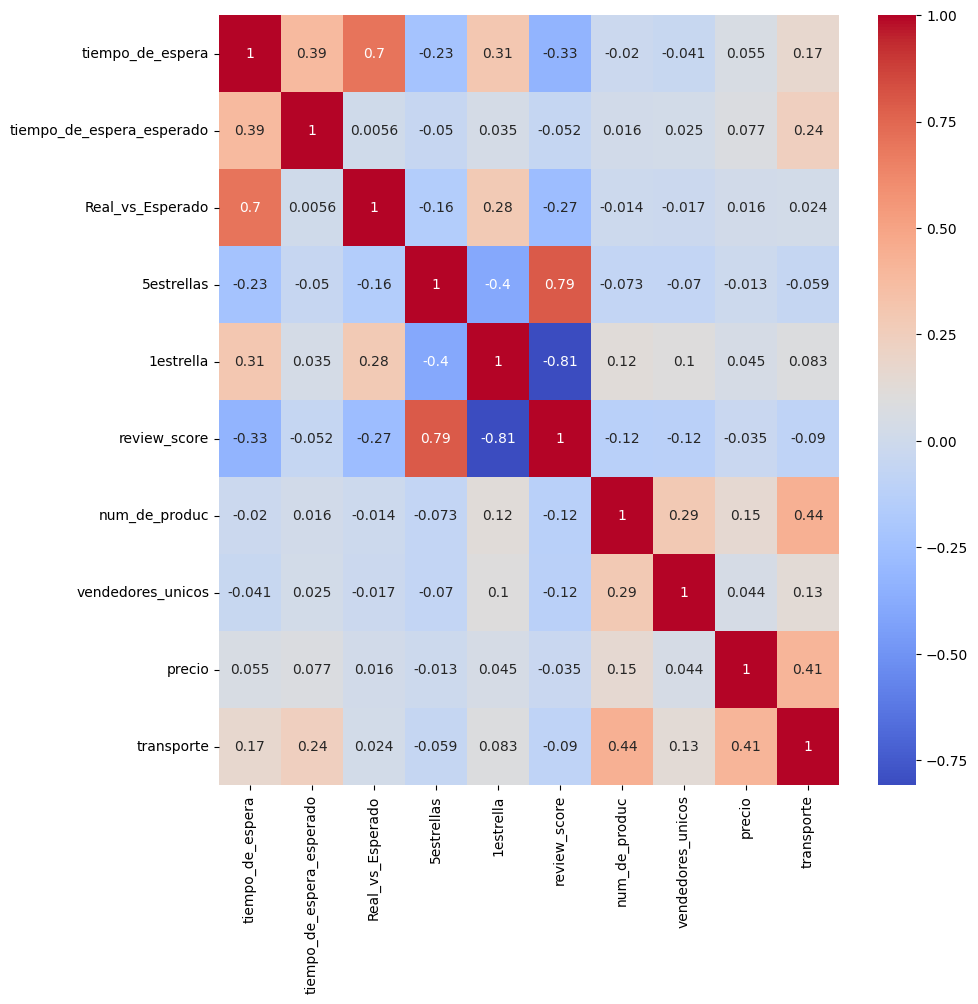

In [6]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    df.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

In [9]:
import statsmodels.formula.api as smf
model = smf.ols(formula='review_score ~ tiempo_de_espera', data=df) 

# Train the model to find best line
model = model.fit()
model

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.208e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:23:41   Log-Likelihood:            -1.5519e+05
No. Observations:               96353   AIC:                         3.104e+05
Df Residuals:                   96351   BIC:                         3.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7236      0.006    729.482      0.000       4.711       4.736
tiempo_de_espera    -0.0453      0.000   -109.902      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19639.914   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35586.515
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.449   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Modelo 2***:

In [18]:
model2 = smf.ols(formula='review_score ~ Real_vs_Esperado', data=df) 

# Train the model to find best line
model2 = model2.fit()
model2

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7715.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:28:55   Log-Likelihood:            -1.5717e+05
No. Observations:               96353   AIC:                         3.143e+05
Df Residuals:                   96351   BIC:                         3.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2124      0.004   1043.898      0.000       4.205       4.220
Real_vs_Esperado    -0.0751      0.001    -87.836      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20752.916   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49852.017
Skew:                          -1.204   Prob(JB):                         0.00
Kurtosis:                       5.573   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



***Modelo 3***:

In [20]:
model3 = smf.ols(formula='review_score ~ tiempo_de_espera + Real_vs_Esperado', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6211.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:30:09   Log-Likelihood:            -1.5504e+05
No. Observations:               96353   AIC:                         3.101e+05
Df Residuals:                   96350   BIC:                         3.101e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6500      0.008    602.765      0.000       4.635       4.665
tiempo_de_espera    -0.0382      0.001    -66.018      0.000      -0.039      -0.037
Real_vs_Esperado    -0.0206      0.001    -17.485      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    20080.290   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40618.500
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [8]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score',
       'number_of_products', 'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer'],
      dtype='object')

In [22]:
features = [ "tiempo_de_espera","real_vs_esperado","num_de_produc","vendedores_unicos","precio", "transporte"]

In [10]:
#standarizar features numericos

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-0.431192,-0.161774,0,0,4,-0.264583,-0.11254,-0.513828,-0.652036,-0.979449
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.134174,-0.161774,0,0,4,-0.264583,-0.11254,-0.086651,0.000493,0.429798
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-0.329907,-0.161774,1,0,5,-0.264583,-0.11254,0.111745,-0.164034,-0.145452
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.073540,-0.161774,1,0,5,-0.264583,-0.11254,-0.441549,0.206848,2.054711
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-1.019535,-0.161774,1,0,5,-0.264583,-0.11254,-0.562416,-0.652036,-0.959089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-0.454309,-0.161774,1,0,5,-0.264583,-0.11254,-0.311532,-0.449399,-0.893005
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.023841,-0.161774,0,0,4,-0.264583,-0.11254,0.183976,-0.123135,-0.212755
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.305780,-0.161774,1,0,5,-0.264583,-0.11254,0.333688,1.964585,0.617689
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.483664,-0.161774,0,0,2,1.601690,-0.11254,1.075217,2.715644,-0.387520


Crear el `modelo4`

In [23]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + number_of_products + vendedores_unicos + precio + transporte'

In [27]:
model3 = smf.ols(formula="review_score ~ tiempo_de_espera + Real_vs_Esperado + num_de_produc + vendedores_unicos + precio + transporte", data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2633.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:07:20   Log-Likelihood:            -1.5356e+05
No. Observations:               96353   AIC:                         3.071e+05
Df Residuals:                   96346   BIC:                         3.072e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.0170      0.033    183.633      0.000       5.953       6.081
tiempo_de_espera     -0.0403      0.001    -68.465      0.000      -0.041      -0.039
Real_vs_Esperado     -0.0187      0.001    -15.915      0.000      -0.021      -0.016
num_de_produc        -0.2680      0.008    -32.254      0.000      -0.284      -0.252
vendedores_unicos    -1.0523      0.032    -32.426      0.000      -1.116      -0.989
precio            -4.018e-05   2.03e-05     -1.979      0.048      -8e-05   -3.86e-07
transporte            0.0016      0.000      7.107      0.000       0.001       0.002
==============================================================================
Omnibus:                    18923.925   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38678.655
Skew:                          -1.173   Prob(JB):                         0.00
Kurtosis:                       5.032   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

las caracteristicas mas importantes son el Rsq que es bastante bajo. Mientras mas cerca este a 1 mejor. el p valor que tiene que estar cerca de 0 y en este caso lo cumple y el coeficiente de cada uno para ver cuanto varia el review score cada que que aumento en uno cada variable. 

en este modelo el rsquared aumento con respecto al modelo 2 por lo tanto es mejor.

In [21]:
#


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





la variable que mas impacto tiene es el precio, despues la cantida de vendedores unicos y tercera el numero de productos. 
A medida que aumentan los productos y vendedores el review score baja
el precio a medida que aumenta cae la review score. en cambio a medida que aumenta en 1 el transporte sube la review sore en 0.0016
El p value es menor a 0.005 por lo tanto esta bien. 

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [28]:
predicted_RS = model3.predict(df[features])
predicted_RS

KeyError: "['real_vs_esperado', 'number_of_products'] not in index"

Computar rmse

In [15]:
##codear RMS (Buscar en wikipedia)

1.1883154116821097

Plotear los resultados

Text(0.5, 1.0, 'residuals density plot')

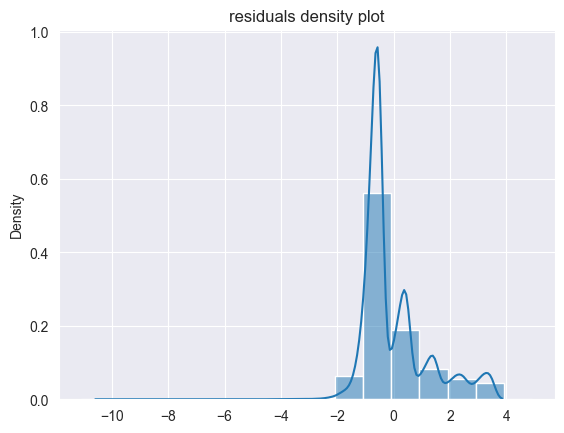

* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

Text(0.5, 1.0, 'distribution of predicted and actual values')

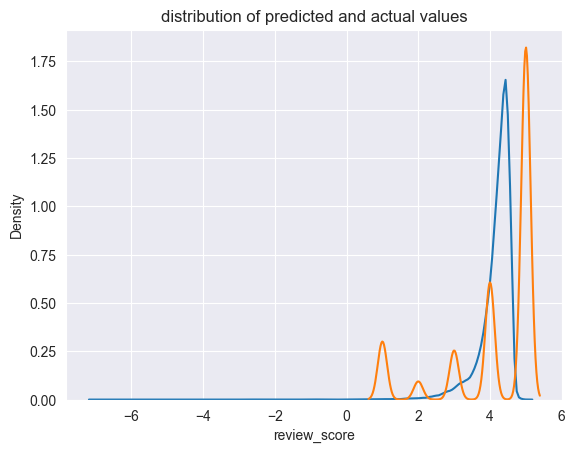

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

(0.0, 5.942038100814559)

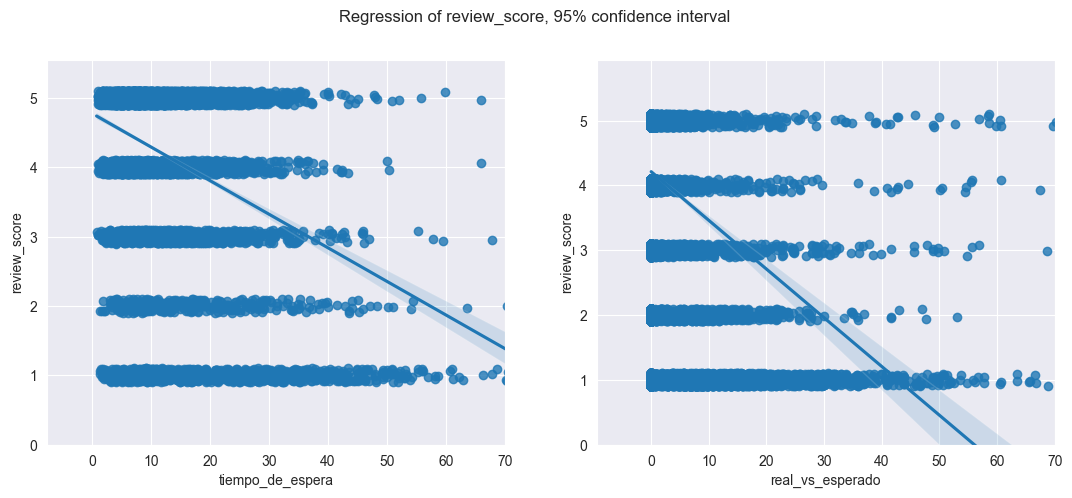